In [67]:
import numpy as np
import pandas as c
import matplotlib.pyplot as plt
import math

In [68]:
ny=100
nx=480

## Compose LB velocity, which located in the cell point (2D) 

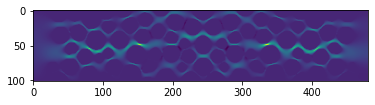

In [69]:
ux_LB=np.fromfile("./LB/0_VelocityX",dtype=float)
uy_LB=np.fromfile("./LB/0_VelocityY",dtype=float)
ux_LB=ux_LB.reshape(ny+1,nx+1)
uy_LB=uy_LB.reshape(ny+1,nx+1)
average_ux_LB=3.1240818E-05
norm_ux_LB=ux_LB/average_ux_LB
norm_uy_LB=uy_LB/average_ux_LB
fig, ax = plt.subplots()
ax.imshow(norm_ux_LB)

## Compose DBS velocity, which located in the cell point (3D)

In [70]:
data=pd.read_csv("./DBS/vel1.csv")
data=data[data["Points:2"]==0]
data.drop(['U:2',"Points:2"], axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48581 entries, 0 to 48580
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Points:0  48581 non-null  float64
 1   Points:1  48581 non-null  float64
 2   U:0       48581 non-null  float64
 3   U:1       48581 non-null  float64
dtypes: float64(4)
memory usage: 1.9 MB


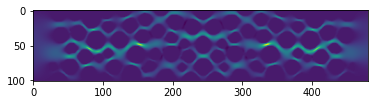

In [71]:
ux_dbs=np.array(data['U:0']).reshape(ny+1,nx+1)
uy_dbs=np.array(data['U:1']).reshape(ny+1,nx+1)
fig, ax = plt.subplots()
average_ux_DBS=3.81798E-04
norm_ux_DBS=ux_dbs/average_ux_DBS
norm_uy_DBS=uy_dbs/average_ux_DBS
ax.imshow(norm_ux_DBS)



## Compare

In [72]:
abs_error=np.abs(norm_ux_LB-norm_ux_DBS)
print(f"max absolute error: {np.max(abs_error)} ")

max absolute error: 9.445712641146645 


In [73]:
relative_error=0
num=0
for i in np.arange(0,ny+1):
    for j in np.arange(0,nx+1):
        if(norm_ux_LB[i,j]>1e-8):
            num +=1
            error=abs_error[i,j]/norm_ux_LB[i,j]
            relative_error +=pow(error,2)

relative_error=math.sqrt(relative_error)/num
print(f"non-zero value num: {num}")
print(f"relative_error: {relative_error*100}%")

non-zero value num: 18818
relative_error: 429.76921327118697%


## Compare the centerline

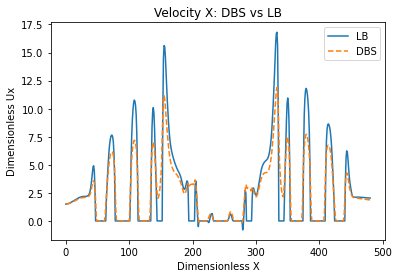

In [74]:
ux_centerline_LB=norm_ux_LB[50,:]
ux_centerline_DBS=norm_ux_DBS[50,:]
fig, ax = plt.subplots()
ax.plot(ux_centerline_LB,lineStyle="-",label="LB")
ax.plot(ux_centerline_DBS,lineStyle="--",label="DBS")
ax.set_xlabel(f"Dimensionless X")
ax.set_ylabel(f"Dimensionless Ux")
ax.set_title(f"Velocity X: DBS vs LB")
ax.legend(loc="upper right")

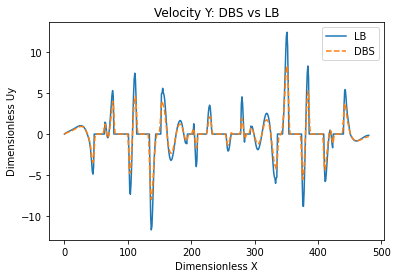

In [75]:
uy_centerline_LB=norm_uy_LB[50,:]
uy_centerline_DBS=norm_uy_DBS[50,:]
fig, ax = plt.subplots()
ax.plot(uy_centerline_LB,lineStyle="-",label="LB")
ax.plot(uy_centerline_DBS,lineStyle="--",label="DBS")
ax.set_xlabel(f"Dimensionless X")
ax.set_ylabel(f"Dimensionless Uy")
ax.set_title(f"Velocity Y: DBS vs LB")
ax.legend(loc="upper right")

## Result

The DBS velocity is lower than the LB velocity. Possible reason:
- SRT-LB is not accuracy to give a confident result as benchmark 
- DBS may not recover very accurate no-slip boundary condition, leading to lower velocity in the pore throat 